In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

games = pd.read_csv('steam.csv')

In [2]:
games

,appid,name,release_date,english,developer,publisher,platforms,required_age,categories,genres,steamspy_tags,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,owners,price
0,10,Counter-Strike,2000-11-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,124534,3339,17612,317,10000000-20000000,7.19
1,20,Team Fortress Classic,1999-04-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,3318,633,277,62,5000000-10000000,3.99
2,30,Day of Defeat,2003-05-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Valve Anti-Cheat enabled,Action,FPS;World War II;Multiplayer,0,3416,398,187,34,5000000-10000000,3.99
3,40,Deathmatch Classic,2001-06-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,1273,267,258,184,5000000-10000000,3.99
4,50,Half-Life: Opposing Force,1999-11-01,1,Gearbox Software,Valve,windows;mac;linux,0,Single-player;Multi-player;Valve Anti-Cheat en...,Action,FPS;Action;Sci-fi,0,5250,288,624,415,5000000-10000000,3.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27070,1065230,Room of Pandora,2019-04-24,1,SHEN JIAWEI,SHEN JIAWEI,windows,0,Single-player;Steam Achievements,Adventure;Casual;Indie,Adventure;Indie;Casual,7,3,0,0,0,0-20000,2.09
27071,1065570,Cyber Gun,2019-04-23,1,Semyon Maximov,BekkerDev Studio,windows,0,Single-player,Action;Adventure;Indie,Action;Indie;Adventure,0,8,1,0,0,0-20000,1.69
27072,1065650,Super Star Blast,2019-04-24,1,EntwicklerX,EntwicklerX,windows,0,Single-player;Multi-player;Co-op;Shared/Split ...,Action;Casual;Indie,Action;Indie;Casual,24,0,1,0,0,0-20000,3.99
27073,1066700,New Yankee 7: Deer Hunters,2019-04-17,1,Yustas Game Studio,Alawar Entertainment,windows;mac,0,Single-player;Steam Cloud,Adventure;Casual;Indie,Indie;Casual;Adventure,0,2,0,0,0,0-20000,5.19


In [3]:
def DataPreProcessing(games):
    
    '''
    games is a pd.DataFrame object with all infomation,
    only keep the year infor of  the release_date and take the middle
    value of the range of the number of owners
    :param games: pd.DataFrame
    :return: None
    '''
    
    assert isinstance(games,pd.DataFrame)
    
    games['release_date'] = pd.to_datetime(games['release_date']).dt.year
    
    users= games['owners'].str.split(r"-",expand = True)
    users = users.astype(int)
    games['owners'] = (users[0]+users[1])//2
    
    

In [4]:
#Reformat release_date and owner values
DataPreProcessing(games)
games

,appid,name,release_date,english,developer,publisher,platforms,required_age,categories,genres,steamspy_tags,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,owners,price
0,10,Counter-Strike,2000,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,124534,3339,17612,317,15000000,7.19
1,20,Team Fortress Classic,1999,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,3318,633,277,62,7500000,3.99
2,30,Day of Defeat,2003,1,Valve,Valve,windows;mac;linux,0,Multi-player;Valve Anti-Cheat enabled,Action,FPS;World War II;Multiplayer,0,3416,398,187,34,7500000,3.99
3,40,Deathmatch Classic,2001,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,1273,267,258,184,7500000,3.99
4,50,Half-Life: Opposing Force,1999,1,Gearbox Software,Valve,windows;mac;linux,0,Single-player;Multi-player;Valve Anti-Cheat en...,Action,FPS;Action;Sci-fi,0,5250,288,624,415,7500000,3.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27070,1065230,Room of Pandora,2019,1,SHEN JIAWEI,SHEN JIAWEI,windows,0,Single-player;Steam Achievements,Adventure;Casual;Indie,Adventure;Indie;Casual,7,3,0,0,0,10000,2.09
27071,1065570,Cyber Gun,2019,1,Semyon Maximov,BekkerDev Studio,windows,0,Single-player,Action;Adventure;Indie,Action;Indie;Adventure,0,8,1,0,0,10000,1.69
27072,1065650,Super Star Blast,2019,1,EntwicklerX,EntwicklerX,windows,0,Single-player;Multi-player;Co-op;Shared/Split ...,Action;Casual;Indie,Action;Indie;Casual,24,0,1,0,0,10000,3.99
27073,1066700,New Yankee 7: Deer Hunters,2019,1,Yustas Game Studio,Alawar Entertainment,windows;mac,0,Single-player;Steam Cloud,Adventure;Casual;Indie,Indie;Casual;Adventure,0,2,0,0,0,10000,5.19


In [5]:
def categories_count(games,col):
    '''
    games is a pd.DataFrame object with all infomation,
    extract either the genres or category column to know how many games in each catergory
    values in each contains semicolon, separate values by comma and count their occurence
    and output as a pd.dataframe
    :param x: pd.DataFrame
    :return: pd.DataFrame
    '''
    
    assert isinstance(games,pd.DataFrame)
    assert isinstance(col,str)
    assert col == 'categories' or col == 'genres'
    x = games[col]
    assert isinstance(x, pd.Series)

    s= x.str.split(r";",expand = True)
    vals = s.apply(pd.value_counts).sum(axis=1,).sort_values(ascending=True).to_frame()
    vals.columns = ["Num of Games"]
    vals.index.name = col

    return vals


In [15]:
# def count_owners(games,col):
    
    
#     '''
#     games is a pd.DataFrame object with all infomation,
#     extract either the genres or category column to know how many games in each catergory
#     values in each contains semicolon, separate values by comma and count their occurence,
#     also, count 
#     :param x: pd.DataFrame
#     :return: pd.DataFrame
#     '''
    
#     assert isinstance(games,pd.DataFrame)
#     assert isinstance(col,str)
#     assert col == 'categories' or col == 'genres'
#     x = games[col]
#     assert isinstance(x, pd.Series)
    
    
#     s= games[col].str.split(r";",expand = True)
#     vals = s.apply(pd.value_counts).sum(axis=1,).sort_values(ascending=True).to_frame()
#     vals.columns = ["Num of Games"]
#     vals.index.name = col
    
#     counts = dict.fromkeys(list(vals.index),0)
    
#     for i in list(s.columns):
#         for key in counts.keys():
#             counts[key]+=games['owners'][s[i]== key].sum()

#     vals['owner']=vals.index.map(counts)
#     return vals
    

#data with selected features
games[['name','genres','positive_ratings','negative_ratings','average_playtime','price','owners']]

,name,genres,positive_ratings,negative_ratings,average_playtime,price,owners
0,Counter-Strike,Action,124534,3339,17612,7.19,15000000
1,Team Fortress Classic,Action,3318,633,277,3.99,7500000
2,Day of Defeat,Action,3416,398,187,3.99,7500000
3,Deathmatch Classic,Action,1273,267,258,3.99,7500000
4,Half-Life: Opposing Force,Action,5250,288,624,3.99,7500000
...,...,...,...,...,...,...,...
27070,Room of Pandora,Adventure;Casual;Indie,3,0,0,2.09,10000
27071,Cyber Gun,Action;Adventure;Indie,8,1,0,1.69,10000
27072,Super Star Blast,Action;Casual;Indie,0,1,0,3.99,10000
27073,New Yankee 7: Deer Hunters,Adventure;Casual;Indie,2,0,0,5.19,10000


In [7]:
all_cat = categories_count(games,'categories')
all_cat

,Num of Games
categories,
Mods (require HL2),1.0
Mods,2.0
Includes Source SDK,35.0
SteamVR Collectibles,40.0
Steam Turn Notifications,63.0
Valve Anti-Cheat enabled,94.0
Commentary available,144.0
VR Support,231.0
MMO,421.0


['Local Multi-Player', 'Co-op', 'Stats', 'Shared/Split Screen', 'Online Multi-Player', 'Steam Leaderboards', 'Multi-player', 'Partial Controller Support', 'Full controller support', 'Steam Cloud', 'Steam Trading Cards', 'Steam Achievements', 'Single-player']


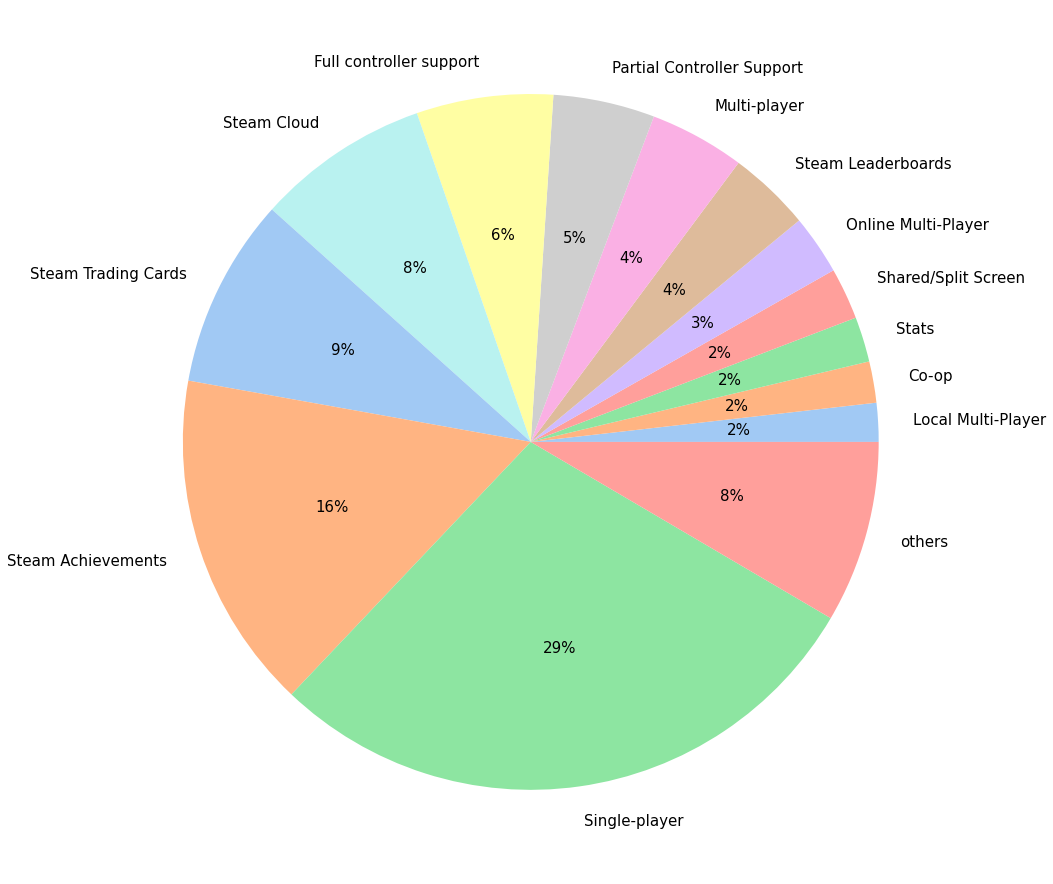

In [8]:
#plot the games distribution over differnet categories

cat_name = list(all_cat.index)[-13:]
print(cat_name)
sums = 0

for val in cat_name:
    sums+=all_cat['Num of Games'][val]

cat_name.append('others')

cat_vals = list(all_cat['Num of Games'])[-13:]
cat_vals.append(all_cat.sum()-sums)

colors = sns.color_palette('pastel')
plt.figure(figsize=(16,16))
plt.title = 'Percentage of Games belong to each category'
plt.pie(cat_vals, labels=cat_name, colors=colors, autopct='%.0f%%',textprops={'fontsize': 15})
plt.show()

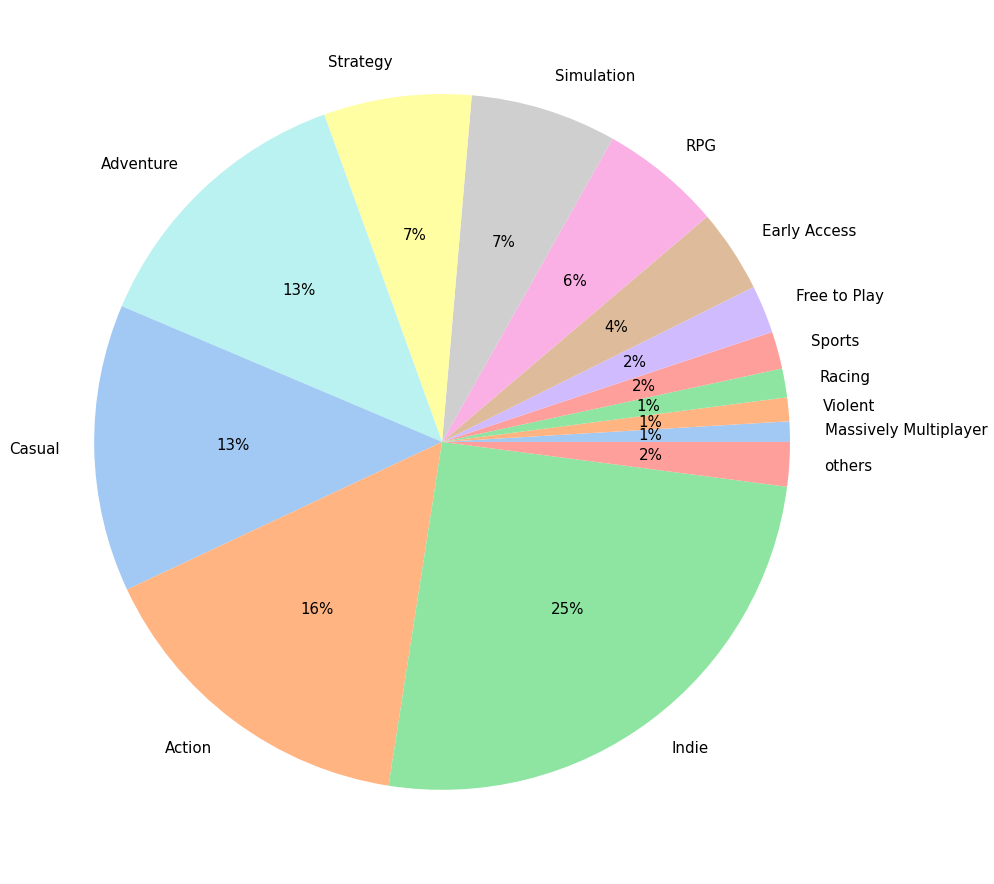

In [9]:
#plot the games distribution over differnet genres

all_gen = categories_count(games,'genres')

gen_name = list(all_gen.index)[-13:]
sums = 0

for val in gen_name:
    sums+=all_gen['Num of Games'][val]

gen_vals = list(all_gen['Num of Games'])[-13:]
gen_vals.append(all_gen.sum()-sums)

gen_name.append('others')
colors = sns.color_palette('pastel')
plt.figure(figsize=(16,16))
plt.pie(gen_vals, labels=gen_name, colors=colors, autopct='%.0f%%',textprops={'fontsize': 15})
plt.show()

In [10]:
def average_rating(game,col):
    
    '''
    games is a pd.DataFrame object with all infomation,
    extract either the genres or category column to know how averagge games, positive ratings,
    neggative ratings, prices, and owners, in each catergory
    categories/genere data semicolon, separate values by comma and count their occurence,
    
    :param x: pd.DataFrame
    :param col: str, either categorize data base on genres or categories
    :return: pd.DataFrame
    '''
    
    assert isinstance(game,pd.DataFrame)
    assert isinstance(col,str)
    assert col == 'categories' or col == 'genres'
    x = game[col]
    assert isinstance(x, pd.Series)
    
    games = game.copy()
    columns = ['positive_ratings','negative_ratings','average_playtime','price','owners']
    
    s= games[col].str.split(r";",expand = True)
    vals = s.apply(pd.value_counts).sum(axis=1,).sort_values(ascending=True).to_frame()
    vals.columns = ["Num of Games"]
    vals.index.name = col
    
    for column in columns:
        temp = games[column].astype(int)
        counts = dict.fromkeys(list(vals.index),0)
        
        for i in list(s.columns):
            
            for key in counts.keys():
                tempInfo = temp[s[i]== key]
                counts[key]+=tempInfo.sum()
            
            
        vals[column]=vals.index.map(counts)/vals['Num of Games']
    
    return vals
        

Text(0.5, 1.0, 'Original Correlation Matrix')

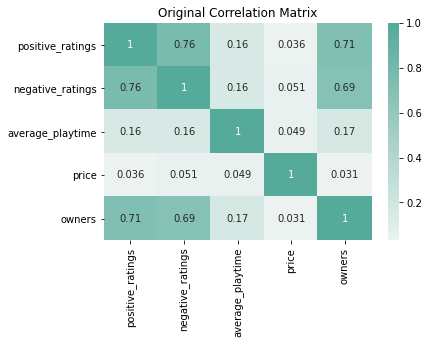

In [14]:
#correlation Matrix based on each game info
game_feature = games[['positive_ratings','negative_ratings','average_playtime','price','owners']]
game_feature.corr()

ax = plt.axes()
sns.heatmap(game_feature.corr(), annot=True,cmap = colors)
ax.set_title('Original Correlation Matrix')


Text(0.5, 1.0, 'Group Games by Genres')

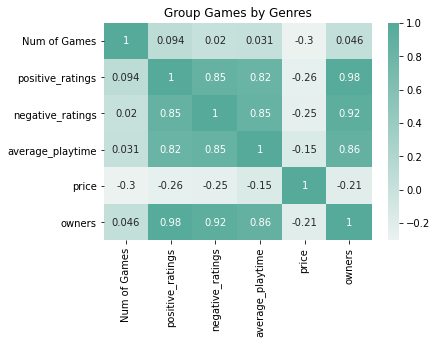

In [11]:
#Group games by genres and sum all features values and divided by number of games in each genres 
#to obtain new data, and determine the correlation matrix
info = average_rating(games,'genres')
info_corr = info.corr()
# plt.figure(figsize = (15,15))
colors = sns.color_palette('light:#5A9',as_cmap=True)

ax = plt.axes()
sns.heatmap(info_corr, annot=True,cmap = colors)
ax.set_title('Group Games by Genres')
                                                    


Text(0.5, 1.0, 'Group Games by Categories')

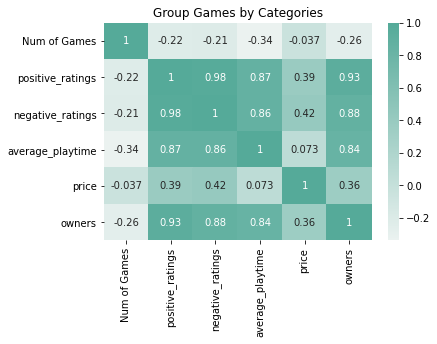

In [12]:
#Group games by categories and sum all features values and divided by number of games in each categories 
#to obtain new data, and determine the correlation matrix

info_cat = average_rating(games,'categories')

ax = plt.axes()
sns.heatmap(info_cat.corr(), annot=True,cmap = colors)
ax.set_title('Group Games by Categories')

